In [1]:
import pandas as pd

# Cargar los datos
df = pd.read_csv('Datos_de_Streaming_OLGA_vs_LUZU.csv')

# Mostrar las primeras filas
df.head()

,Fecha,Canal,Programa,Conductor,Viewers promedio (en vivo),Pico de Viewers,Cantidad de mensajes en vivo,Duración (minutos),Tema central del programa
0,2025-06-02,LUZU TV,Nadie dice nada,Nicolás Occhiato,23932,41299,7359,105,Entrevista a famoso
1,2025-06-03,LUZU TV,Nadie dice nada,Nicolás Occhiato,18695,36744,10075,124,Noticias de actualidad
2,2025-06-04,LUZU TV,Nadie dice nada,Nicolás Occhiato,27914,30019,5573,128,Anécdotas personales
3,2025-06-05,LUZU TV,Nadie dice nada,Nicolás Occhiato,29158,47995,14020,102,Entrevista a famoso
4,2025-06-06,LUZU TV,Nadie dice nada,Nicolás Occhiato,22731,31440,11362,108,Tema viral del día


In [2]:
# Tamaño del dataset
print("Filas y columnas:", df.shape)

# Tipos de datos
print("\nTipos de datos:")
print(df.dtypes)

# Ver si hay valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Estadísticas generales de las columnas numéricas
print("\nEstadísticas descriptivas:")
print(df.describe())

Filas y columnas: (14, 9)

Tipos de datos:
Fecha                           object
Canal                           object
Programa                        object
Conductor                       object
Viewers promedio (en vivo)       int64
Pico de Viewers                  int64
Cantidad de mensajes en vivo     int64
Duración (minutos)               int64
Tema central del programa       object
dtype: object

Valores nulos por columna:
Fecha                           0
Canal                           0
Programa                        0
Conductor                       0
Viewers promedio (en vivo)      0
Pico de Viewers                 0
Cantidad de mensajes en vivo    0
Duración (minutos)              0
Tema central del programa       0
dtype: int64

Estadísticas descriptivas:
       Viewers promedio (en vivo)  Pico de Viewers  \
count                   14.000000        14.000000   
mean                 25295.071429     41108.285714   
std                   4253.457751      6790.627618   
m

In [3]:
# Convertir columna 'Fecha' a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])

# Extraer día de la semana (por si hay patrones por día)
df['Día semana'] = df['Fecha'].dt.day_name()

# Agregar ratio de mensajes por minuto
df['Mensajes por minuto'] = df['Cantidad de mensajes en vivo'] / df['Duración (minutos)']

# Mostrar primeras filas con las nuevas columnas
df.head()

,Fecha,Canal,Programa,Conductor,Viewers promedio (en vivo),Pico de Viewers,Cantidad de mensajes en vivo,Duración (minutos),Tema central del programa,Día semana,Mensajes por minuto
0,2025-06-02,LUZU TV,Nadie dice nada,Nicolás Occhiato,23932,41299,7359,105,Entrevista a famoso,Monday,70.085714
1,2025-06-03,LUZU TV,Nadie dice nada,Nicolás Occhiato,18695,36744,10075,124,Noticias de actualidad,Tuesday,81.250000
2,2025-06-04,LUZU TV,Nadie dice nada,Nicolás Occhiato,27914,30019,5573,128,Anécdotas personales,Wednesday,43.539062
3,2025-06-05,LUZU TV,Nadie dice nada,Nicolás Occhiato,29158,47995,14020,102,Entrevista a famoso,Thursday,137.450980
4,2025-06-06,LUZU TV,Nadie dice nada,Nicolás Occhiato,22731,31440,11362,108,Tema viral del día,Friday,105.203704


C:\Users\Lucas Ac\AppData\Local\Temp\ipykernel_10632\2906296940.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Canal', y='Viewers promedio (en vivo)', ci=None)


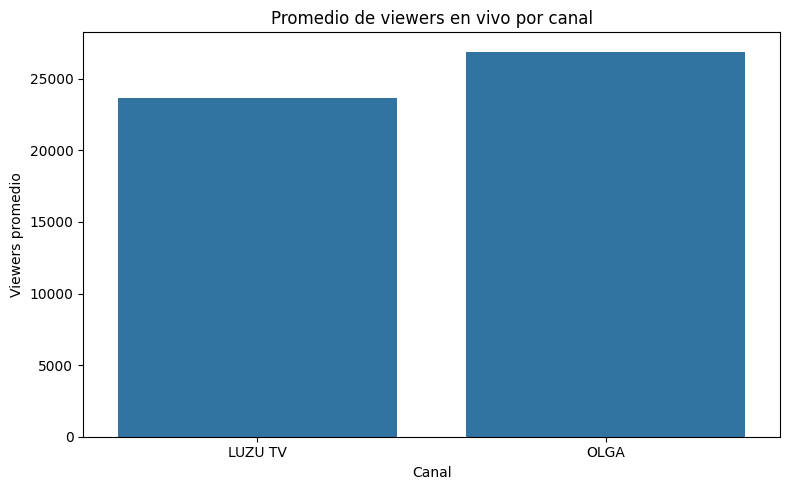

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Canal', y='Viewers promedio (en vivo)', ci=None)
plt.title('Promedio de viewers en vivo por canal')
plt.ylabel('Viewers promedio')
plt.xlabel('Canal')
plt.tight_layout()
plt.show()

C:\Users\Lucas Ac\AppData\Local\Temp\ipykernel_10632\2977925601.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Canal', y='Mensajes por minuto', ci=None)


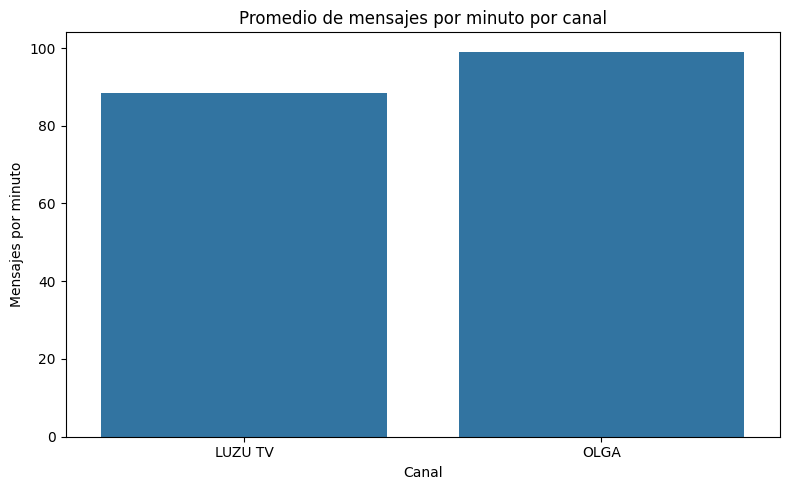

In [5]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x='Canal', y='Mensajes por minuto', ci=None)
plt.title('Promedio de mensajes por minuto por canal')
plt.ylabel('Mensajes por minuto')
plt.xlabel('Canal')
plt.tight_layout()
plt.show()

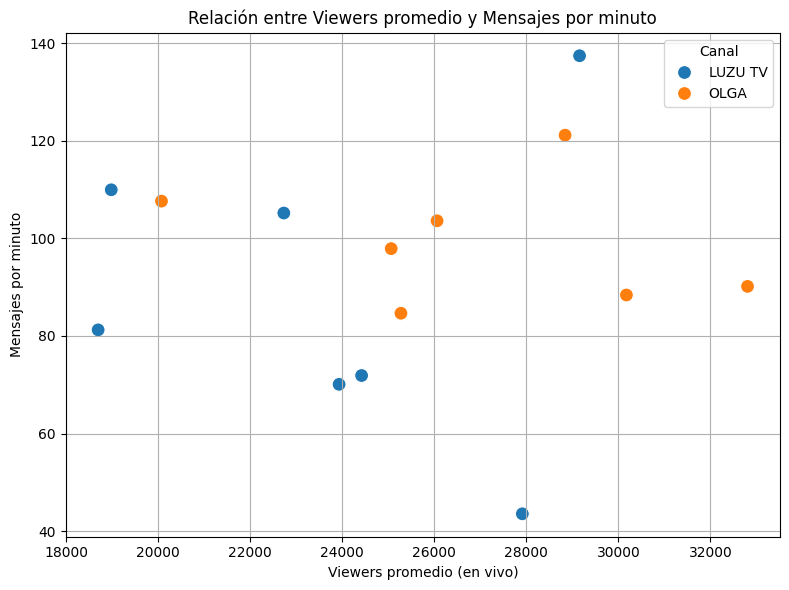

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Viewers promedio (en vivo)', y='Mensajes por minuto', hue='Canal', s=100)
plt.title('Relación entre Viewers promedio y Mensajes por minuto')
plt.xlabel('Viewers promedio (en vivo)')
plt.ylabel('Mensajes por minuto')
plt.legend(title='Canal')
plt.grid(True)
plt.tight_layout()
plt.show()